In [43]:
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd

In [47]:
def plot_loss_convergence(directory, dataset, labels):
    file_pattern = os.path.join(directory, '*.csv')
    files = glob.glob(file_pattern)
    plt.figure(figsize=(10, 10))

    if not files:
        print(f"No CSV files found in directory: {directory}")
        return

    for idx, file in enumerate(files):
        try:
            df = pd.read_csv(file, delimiter=',')
            epochs = df['Epoch']
            train_loss = df['Train Loss']

            if not epochs.empty and not train_loss.empty:
                label = labels[idx] if idx < len(labels) else f"File {idx+1}"
                plt.plot(epochs, train_loss, label=label)
            else:
                print(f"No valid data found in file: {file}")

        except Exception as e:
            print(f"Error processing file {file}: {e}")

    plt.xlabel('Number of epochs')
    plt.ylabel('Training loss')
    plt.title(f'{dataset} Loss Convergence Plot')
    plt.legend(loc='upper right')
    plt.grid(True)
    output_path = f'./docs/lossplot_{dataset}.png'
    plt.savefig(output_path, dpi=1000)
    plt.show()
    print(f"Plot saved to {output_path}")

In [48]:
def plot_accuracy_convergence(directory, dataset, labels):
    file_pattern = os.path.join(directory, '*.csv')
    files = glob.glob(file_pattern)
    plt.figure(figsize=(10, 10))

    if not files:
        print(f"No CSV files found in directory: {directory}")
        return

    for idx, file in enumerate(files):
        try:
            df = pd.read_csv(file)  # Assuming CSV is comma-separated
            epochs = df['Epoch']
            train_accuracy = df['Train Accuracy']
            test_accuracy = df['Test Accuracy']

            if not epochs.empty and not train_accuracy.empty and not test_accuracy.empty:
                label = labels[idx] if idx < len(labels) else f"File {idx+1}"
                plt.plot(epochs, train_accuracy, label=label)
            else:
                print(f"No valid data found in file: {file}")

        except pd.errors.ParserError as pe:
            print(f"ParserError: Error processing file {file}: {pe}")
        except Exception as e:
            print(f"Error processing file {file}: {e}")

    plt.xlabel('Number of epochs')
    plt.ylabel('Training accuracy')
    plt.title(f'{dataset} Training Accuracy Plot')
    plt.legend(loc='lower right')
    plt.grid(True)
    output_path = f'./docs/accuracyplot_{dataset}.png'
    plt.savefig(output_path, dpi=1000)
    plt.show()
    print(f"Plot saved to {output_path}")

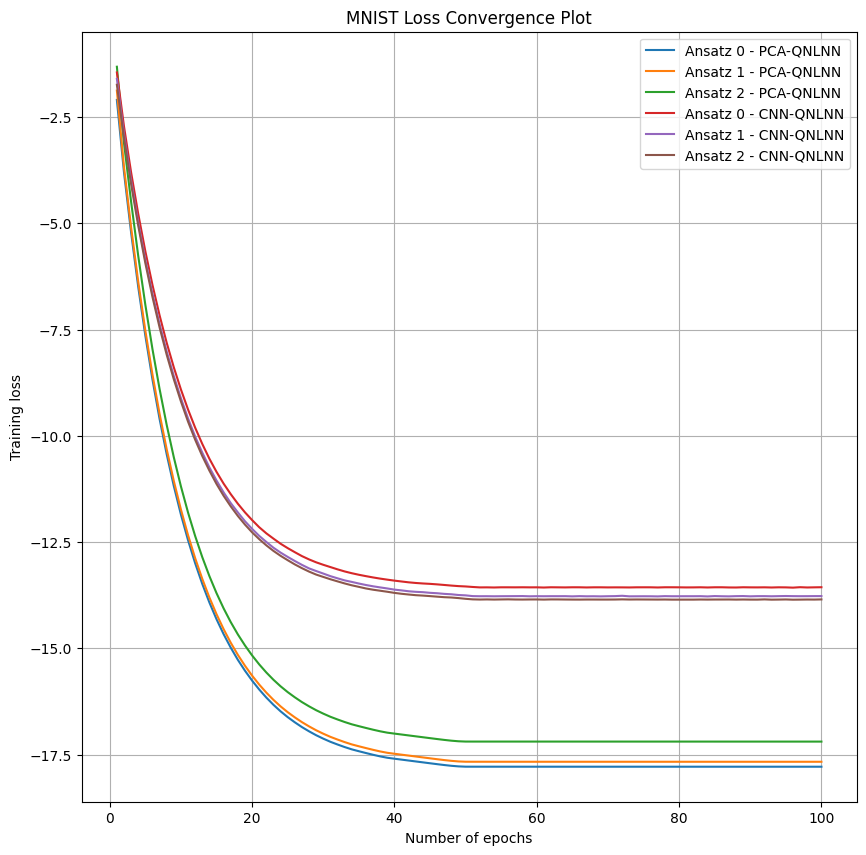

Plot saved to ./docs/lossplot_MNIST.png


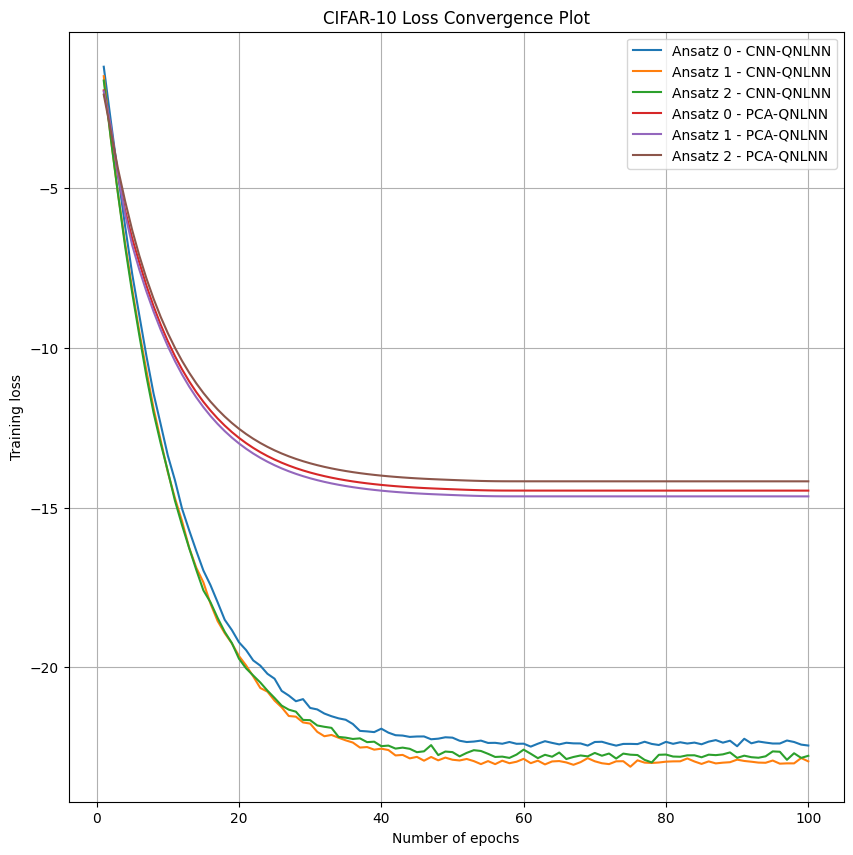

Plot saved to ./docs/lossplot_CIFAR-10.png


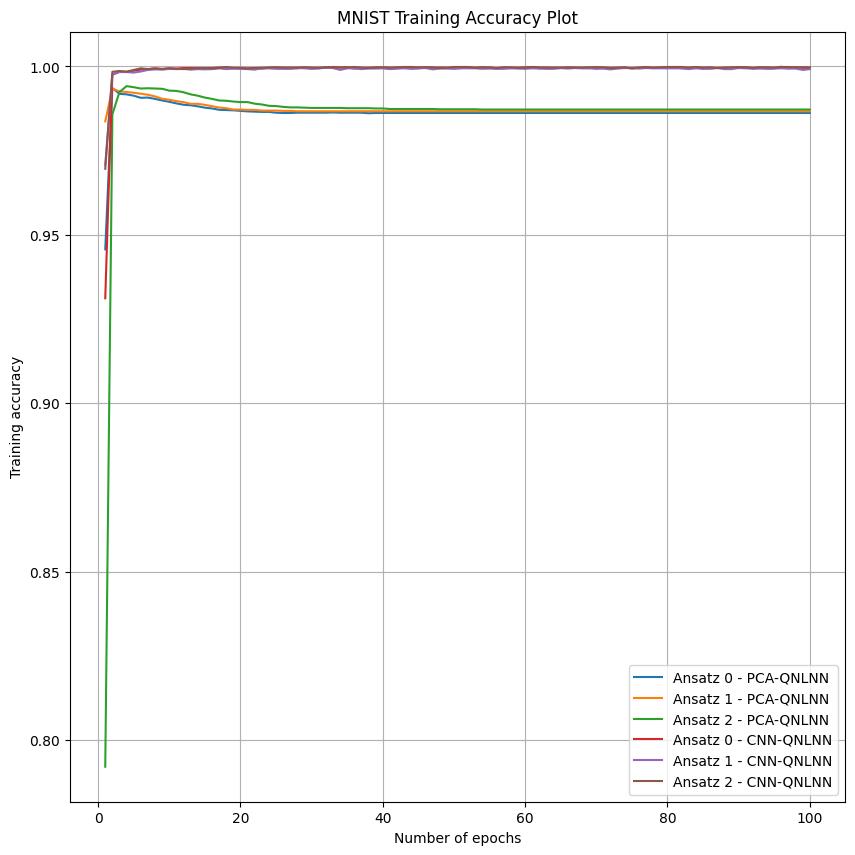

Plot saved to ./docs/accuracyplot_MNIST.png


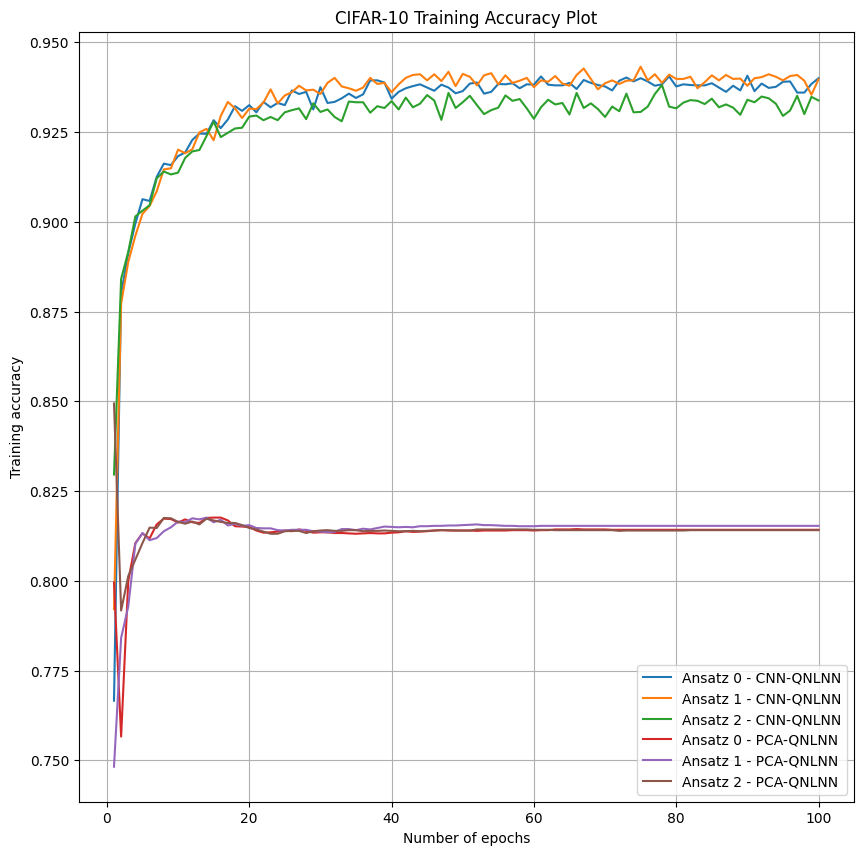

Plot saved to ./docs/accuracyplot_CIFAR-10.png


In [49]:
mnist_dir = './mnist_digit_binaryclass/epoch_data/'
cifar10_dir = './cifar10_binaryclass/epoch_data/'
labels_mnist = [
    'Ansatz 0 - PCA-QNLNN', 'Ansatz 1 - PCA-QNLNN', 'Ansatz 2 - PCA-QNLNN',
    'Ansatz 0 - CNN-QNLNN', 'Ansatz 1 - CNN-QNLNN', 'Ansatz 2 - CNN-QNLNN']
labels_cifar10 = [
    'Ansatz 0 - CNN-QNLNN', 'Ansatz 1 - CNN-QNLNN', 'Ansatz 2 - CNN-QNLNN',
    'Ansatz 0 - PCA-QNLNN', 'Ansatz 1 - PCA-QNLNN', 'Ansatz 2 - PCA-QNLNN']
plot_loss_convergence(mnist_dir, 'MNIST', labels=labels_mnist)
plot_loss_convergence(cifar10_dir, 'CIFAR-10', labels=labels_cifar10)
plot_accuracy_convergence(mnist_dir, 'MNIST', labels=labels_mnist)
plot_accuracy_convergence(cifar10_dir, 'CIFAR-10', labels=labels_cifar10)